In [1]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import graphviz

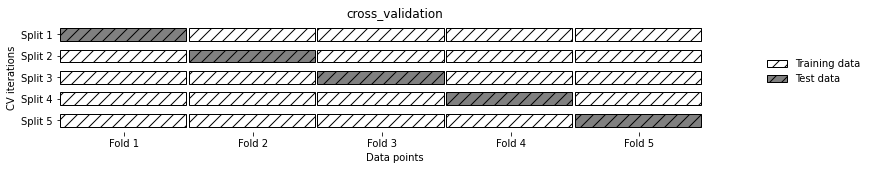

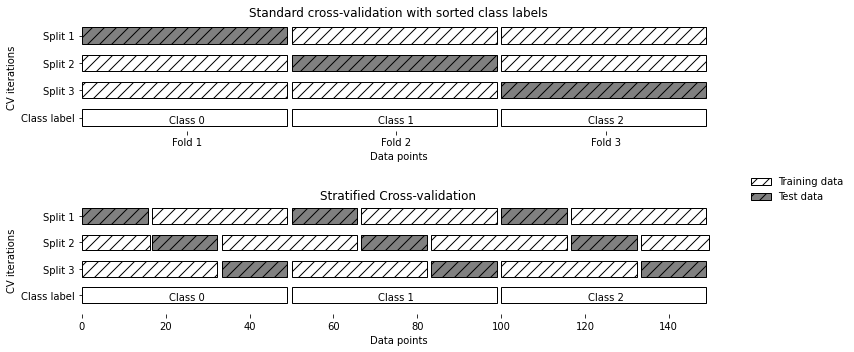

In [2]:
mglearn.plots.plot_cross_validation()


mglearn.plots.plot_stratified_cross_validation()

Text(0, 0.5, 'Feature 2')

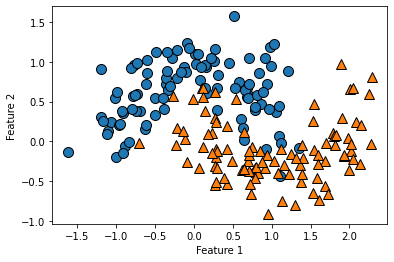

In [3]:
from sklearn.datasets import make_moons
from mglearn.tools import discrete_scatter
X, y = make_moons(n_samples=200, noise=0.25, random_state=89)
plt.figure()
ax = plt.gca()
discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

Accuracy on test set: 0.925
Cross_validation score:[0.825 0.875 0.925 0.875 0.95 ]
Average Score:0.890


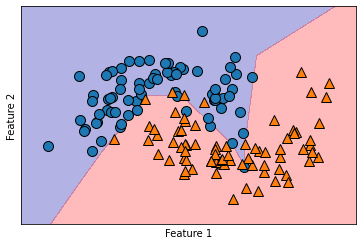

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)
mlp = MLPClassifier(solver = "lbfgs", random_state = 0 , hidden_layer_sizes = [10, 10], max_iter = 10000 ).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

print("Accuracy on test set: {:.3f}".format(mlp.score(X, y)))

scores = cross_val_score(MLPClassifier(solver = "lbfgs", random_state = 0, hidden_layer_sizes = [10, 10], max_iter = 10000 ), X, y, cv = 5)
print("Cross_validation score:{}".format(scores))
print("Average Score:{:.3f}".format(scores.mean()))

Accuracy on test set: 0.915
Cross_validation score:[0.9   0.875 0.925 0.95  0.925]
Average Score:0.915


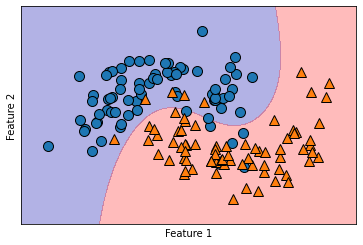

In [5]:
from sklearn import svm

svm_1 = svm.SVC(gamma="scale").fit(X_train, y_train)
mglearn.plots.plot_2d_separator(svm_1, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

print("Accuracy on test set: {:.3f}".format(svm_1.score(X, y)))

scores_2 = cross_val_score(svm_1, X, y, cv = 5)
print("Cross_validation score:{}".format(scores_2))
print("Average Score:{:.3f}".format(scores_2.mean()))

In [6]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

display(pd.DataFrame(wine["data"]))



alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(wine["data"], wine["target"],  random_state = 10)
mlp = MLPClassifier(solver = "lbfgs", random_state = 0 , hidden_layer_sizes = [10, 10], max_iter = 10000 ).fit(X_train, y_train)

print("Accuracy on test set: {:.3f}".format(mlp.score(wine["data"], wine["target"])))

scores = cross_val_score(MLPClassifier(solver = "lbfgs", random_state = 0, hidden_layer_sizes = [10, 10] , max_iter = 10000), wine["data"], wine["target"], cv = 10)
print("Cross_validation score:{}".format(scores))
print("Average Score:{:.3f}".format(scores.mean()))

Accuracy on test set: 0.944
Cross_validation score:[0.83333333 0.94444444 0.83333333 1.         0.83333333 0.94444444
 0.94444444 0.94444444 1.         1.        ]
Average Score:0.928


In [8]:
svm_2 = svm.SVC(gamma="scale").fit(X_train, y_train)

print("Accuracy on test set: {:.3f}".format(svm_2.score(wine["data"], wine["target"])))

scores_2 = cross_val_score(svm_2, wine["data"], wine["target"], cv = 10)
print("Cross_validation score:{}".format(scores_2))
print("Average Score:{:.3f}".format(scores_2.mean()))

Accuracy on test set: 0.719
Cross_validation score:[0.61111111 0.66666667 0.61111111 0.61111111 0.61111111 0.61111111
 0.66666667 0.83333333 0.82352941 0.76470588]
Average Score:0.681
